In [1]:
#download dataset
!kaggle datasets download -d alincijov/self-driving-cars --force



  0%|          | 0.00/892M [00:00<?, ?B/s]
  0%|          | 1.00M/892M [00:00<11:19, 1.37MB/s]
  0%|          | 2.00M/892M [00:01<08:28, 1.83MB/s]
  0%|          | 3.00M/892M [00:01<07:34, 2.05MB/s]
  0%|          | 4.00M/892M [00:02<07:07, 2.18MB/s]
  1%|          | 5.00M/892M [00:02<06:53, 2.25MB/s]
  1%|          | 6.00M/892M [00:03<07:19, 2.11MB/s]
  1%|          | 7.00M/892M [00:03<07:44, 2.00MB/s]
  1%|          | 8.00M/892M [00:04<07:46, 1.99MB/s]
  1%|1         | 9.00M/892M [00:04<07:34, 2.04MB/s]
  1%|1         | 10.0M/892M [00:05<07:29, 2.06MB/s]
  1%|1         | 11.0M/892M [00:05<07:43, 1.99MB/s]
  1%|1         | 12.0M/892M [00:06<07:32, 2.04MB/s]
  1%|1         | 13.0M/892M [00:06<07:53, 1.95MB/s]
  2%|1         | 14.0M/892M [00:07<07:32, 2.03MB/s]
  2%|1         | 15.0M/892M [00:07<07:11, 2.13MB/s]
  2%|1         | 16.0M/892M [00:08<06:55, 2.21MB/s]
  2%|1         | 17.0M/892M [00:08<06:46, 2.26MB/s]
  2%|2         | 18.0M/892M [00:09<06:38, 2.30MB/s]
  2%|2         | 19.

In [10]:
# unzip file
import zipfile

zip_file_path = 'self-driving-cars.zip'
extract_dir = './data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted successfully.")


Files extracted successfully.


In [6]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [13]:
df = pd.read_csv(r'data/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
124664,1479505528440598404.jpg,165,177,143,155,1
33999,1478896587305649029.jpg,184,195,150,161,1
37048,1478896827247324595.jpg,141,156,147,160,1
3638,1478020418704157608.jpg,141,165,148,162,1
56216,1478898328597323693.jpg,412,444,142,170,4


In [14]:
classes = df.class_id.unique()
print(classes)

[1 4 5 3 2]


In [15]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [19]:
import os
import cv2

boxes = {}
images = {}

base_path = r'data\images'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    image_path = os.path.join(base_path, first_row['frame'])
    
    # Check if the image file exists
    if os.path.exists(image_path):
        images[class_id] = cv2.imread(image_path)
        boxes[class_id] = [first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']]
    else:
        print(f"File not found: {image_path}")


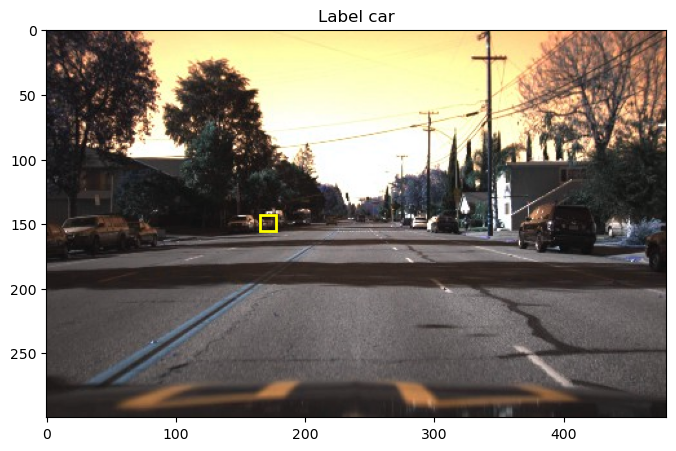

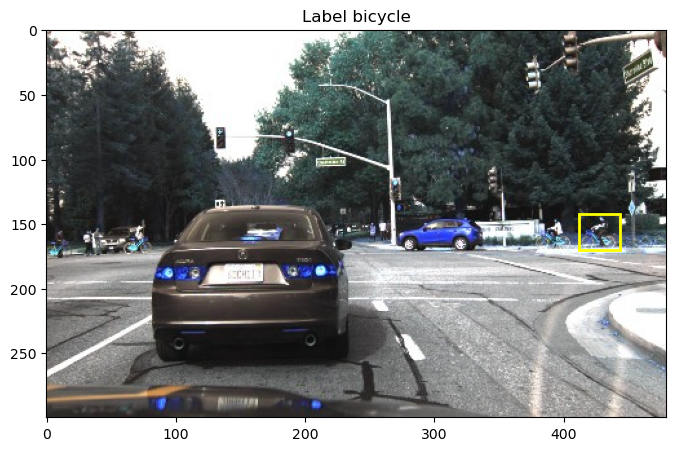

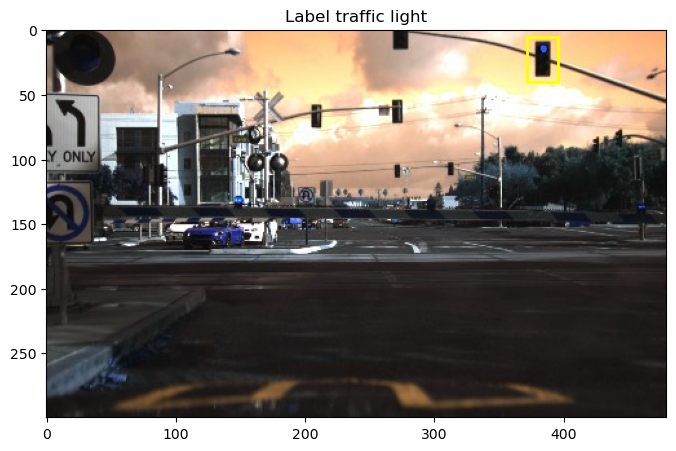

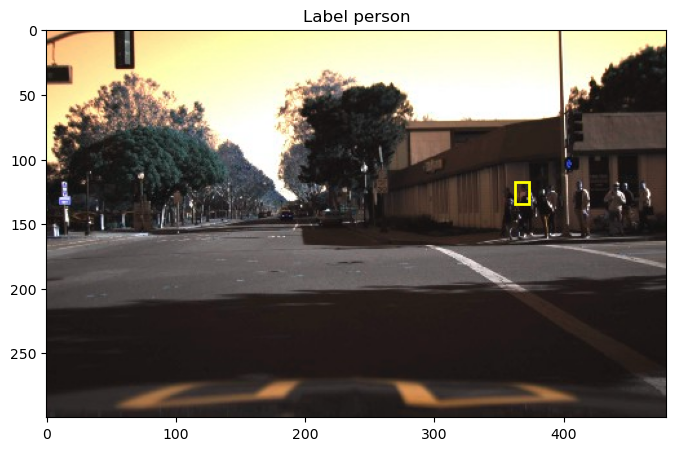

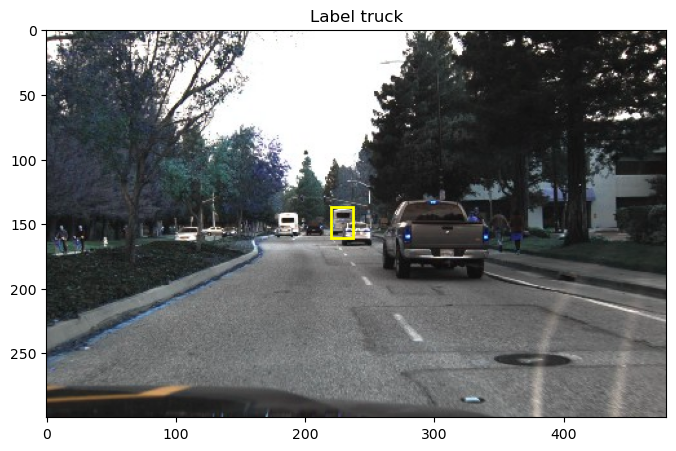

In [20]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

In [21]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

In [23]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")


In [34]:
results=model.predict(source=r'data\images\1478019956680248165.jpg',
              save=True, conf=0.2,iou=0.5)


image 1/1 C:\Users\hela1\data\images\1478019956680248165.jpg: 416x640 1 car, 76.4ms
Speed: 3.7ms preprocess, 76.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


In [35]:
result = results[0]
box = result.boxes[0]

In [36]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [37]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.05963134765625, 141.4466094970703, 151.26821899414062, 162.14723205566406]
Probability: 0.5924849510192871


In [38]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [124, 141, 151, 162]
Probability: 0.59
---


In [39]:
results1 = model.predict(source=r"data\images\1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 C:\Users\hela1\data\images\1478020211690815798.jpg: 416x640 3 cars, 2 traffic lights, 74.2ms
Speed: 0.0ms preprocess, 74.2ms inference, 10.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


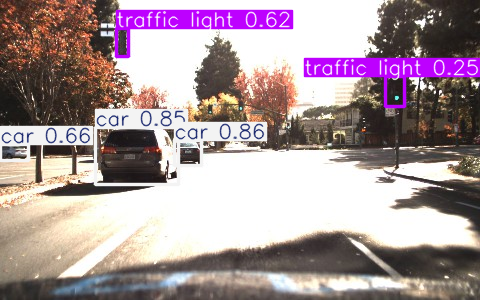

In [40]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))